In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Продолжим анализ данных по поездкам. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!
Сохраните данные, находящиеся в папке (taxi_peru.csv), в переменную taxi, разделитель – ;. Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .


In [55]:
taxi=pd.read_csv(r'C:\Users\taxi_peru.csv',sep=';')

In [56]:
taxi['start_at']=pd.to_datetime(taxi.start_at)
taxi['end_at']=pd.to_datetime(taxi.end_at)
taxi['arrived_at']=pd.to_datetime(taxi.arrived_at)

In [60]:
taxi[['start_at', 'end_at', 'arrived_at']]=taxi[['start_at', 'end_at', 'arrived_at']].apply(pd.to_datetime)#2 способ
#taxi=pd.read_csv(r'C:\Users\Леруся\Desktop\[freekurses.com] 4\[freekurses.com] Задания\taxi_peru.csv', parse_dates=['start_at', 'end_at', 'arrived_at'],sep=';')

In [61]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [67]:
taxi=taxi.query('start_type=="asap" or start_type=="reserved"')

⭐️Задание со звёздочкой!⭐️
Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах. Чтобы сконвертировать полученный результат в минуты, можно использовать метод  .astype('timedelta64[m]')


In [68]:
taxi['wait_time']=(taxi.arrived_at-taxi.start_at).astype('timedelta64[m]')

⭐️Задание со звёздочкой!⭐️
Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз


In [78]:
taxi.query("start_type == 'reserved' and wait_time > 0.0")\
        .groupby('driver_id')\
        .agg({'taxi_id':'count'})\
        .sort_values('taxi_id',ascending=False)\
        .idxmax()

taxi_id    406921adcca37705ef527b4246c0cfea
dtype: object

In [81]:
taxi.query("start_type == 'reserved' and wait_time > 0.0")\#2 способ
        .driver_id\
        .value_counts()\
        .idxmax()

'406921adcca37705ef527b4246c0cfea'

Добавьте столбец month, где будет храниться месяц, в котором был сделан заказ (start_at), как номер, и столбец weekday – название дня недели. 

In [111]:
taxi['month']=taxi.start_at.dt.month

In [87]:
taxi['weekday']=taxi.start_at.dt.strftime('%A')
taxi['weekday']

0         Tuesday
1         Tuesday
2          Monday
3         Tuesday
4        Saturday
           ...   
23106    Saturday
23107    Saturday
23108     Tuesday
23109    Thursday
23110     Tuesday
Name: weekday, Length: 23091, dtype: object

⭐️Задание со звёздочкой!⭐️
Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 
Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


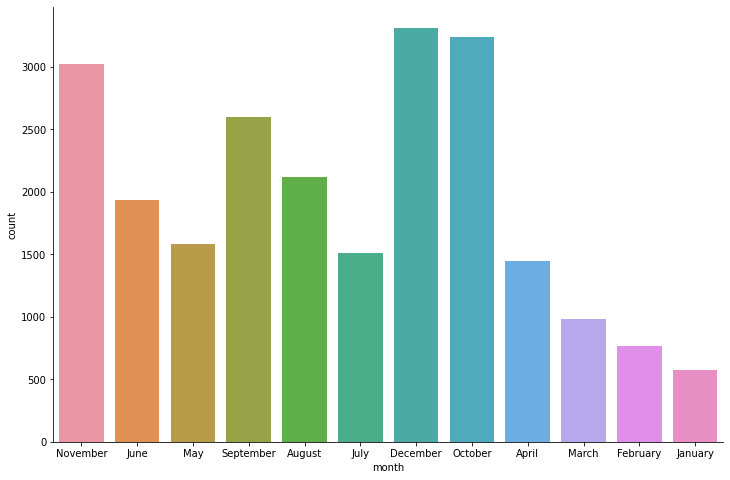

In [92]:
plt.figure(figsize=(12,8))
sns.countplot(taxi.month)
sns.despine()#убирает черные линии по краям

⭐️Задание со звёздочкой!⭐️
А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 
sns.countplot(data['column'], order=['One', 'Two', 'Three'])
Вопрос: в какой день недели суммарно поступило меньше всего заказов?


c:\programdata\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

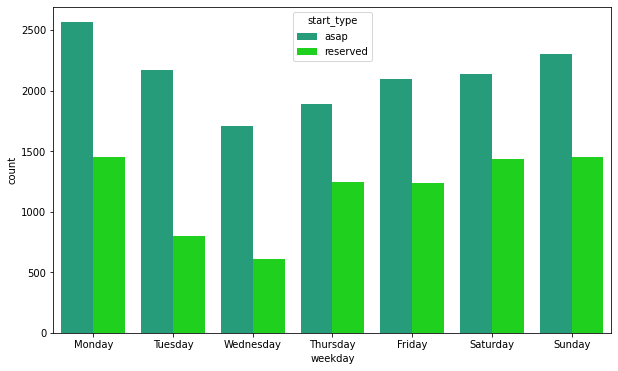

In [109]:
plt.figure(figsize=(10,6))
sns.countplot('weekday',
              data=taxi, 
              order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],
              hue='start_type',
             palette=['#14af84','#01ed01'])#колонку с днем недели выносим отдельно перед указанием того, по какой колонке будем делить

⭐️Задание со звёздочкой!⭐️
Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:
- DAU (daily active users) – число уникальных пользователей за день
- WAU (weekly active users) – число уникальных пользователей за неделю
- MAU (monthly active users) – число уникальных пользователей за месяц
Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. Постройте график MAU и выберите верные утверждения. 
Могут пригодиться:
- groupby – группировка
- nunique – число уникальных значений
- plot.line – линейная диаграмма


In [113]:
mau=taxi.groupby('month')\
    .agg({'user_id':pd.Series.nunique})

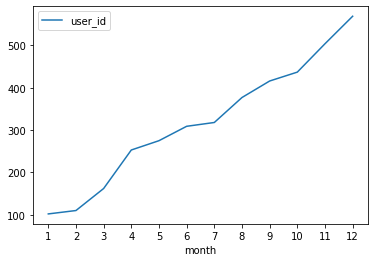

In [122]:
xticks=range(1,13)

sns.lineplot(data=mau)
plt.xticks(xticks);#делим на 12 промежутков, а не 6
#mau.plot(figsize=(12,8))